In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model

In [ ]:
img_rows = 32
img_cols = 32
channels = 3
img_shape = (img_rows, img_cols, channels)

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
def build_generator():
  noise_shape = (100,)
  model = Sequential()

  model.add(Dense(256, input_shape=noise_shape))
  model.add(LeakyReLU(alpha=0.2))
   
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))

  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod(img_shape), activation='tanh'))
  model.add(Reshape(img_shape))
  model.summary()

  noise = Input(shape=noise_shape)
  fake_img = model(noise)
  return Model(noise, fake_img)

In [ ]:
def build_discriminator():
  model = Sequential()
  model.add(Flatten(input_shape = img_shape))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape = img_shape)
  validity = model(img)
  
  return Model(img, validity)

In [ ]:
import gc

In [ ]:
gc.collect()

483

In [ ]:
def train(epochs, batch_size = 128, save_interval = 50):
  (x_train, _), (_, _) = cifar10.load_data()
  x_train = (x_train.astype(np.float32) - 127.5) / 127.5
  # x_train = np.expand_dims(x_train, axis = 3)
  half_batch = int(batch_size / 2)

  for epoch in range(epochs):
    # gc.collect()
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    imgs = x_train[idx]
    # print(imgs.shape)
    #half batch number of vectors each of size 100
    noise = np.random.normal(0, 1, (half_batch, 100))
    gen_imgs = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100)) 
    valid_y = np.array([1] * batch_size)
    g_loss = combined.train_on_batch(noise, valid_y)
    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
    if epoch % save_interval == 0:
      save_imgs(epoch)

In [ ]:
def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("/content/drive/MyDrive/GAN/20k")
    plt.close()
#This function saves our images for us to view

In [ ]:
optimizer = Adam(0.0002, 0.5)  #Learning rate and momentum.

In [ ]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)
z = Input(shape=(100,))   #Our random input to the generator
img = generator(z)
discriminator.trainable = False
valid = discriminator(img)
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)


train(epochs=10000, batch_size=32, save_interval=10)
generator.save('generator_model.h5')

Streaming output truncated to the last 5000 lines.
5000 [D loss: 0.332074, acc.: 90.62%] [G loss: 3.136894]
5001 [D loss: 0.315799, acc.: 81.25%] [G loss: 3.078535]
5002 [D loss: 0.183637, acc.: 100.00%] [G loss: 2.602072]
5003 [D loss: 0.405818, acc.: 84.38%] [G loss: 2.530690]
5004 [D loss: 0.281981, acc.: 90.62%] [G loss: 3.934245]
5005 [D loss: 0.340875, acc.: 90.62%] [G loss: 2.758511]
5006 [D loss: 0.310656, acc.: 90.62%] [G loss: 2.866815]
5007 [D loss: 0.357446, acc.: 84.38%] [G loss: 3.074643]
5008 [D loss: 0.297830, acc.: 90.62%] [G loss: 2.587712]
5009 [D loss: 0.328566, acc.: 87.50%] [G loss: 2.726187]
5010 [D loss: 0.280556, acc.: 87.50%] [G loss: 3.248188]
5011 [D loss: 0.354504, acc.: 84.38%] [G loss: 2.999050]
5012 [D loss: 0.323560, acc.: 87.50%] [G loss: 2.303407]
5013 [D loss: 0.440043, acc.: 78.12%] [G loss: 2.484022]
5014 [D loss: 0.331004, acc.: 84.38%] [G loss: 3.092989]
5015 [D loss: 0.281997, acc.: 90.62%] [G loss: 2.331687]
5016 [D loss: 0.405455, acc.: 81.25%

In [ ]:
out = generator.predict(np.random.normal(0,1,(60,100)),batch_size=8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


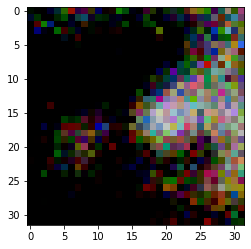

In [ ]:
plt.imshow(out[59][:,:,:])